<!-- BORDURE PRINCIPALE -->
<table style="width:100%; border:3px solid #000; padding:40px;">
<tr><td>

<!-- EN-TÊTE CENTRÉE -->
<p style="text-align:center; font-size:18px; font-weight:bold; margin:0;">
    UNIVERSITÉ DE BOURGOGNE EUROPE
</p>

<p style="text-align:center; font-size:16px; margin:0;">
    Master Ingénierie Mathématique, Algorithmique et Statistiques
</p>

<p style="text-align:center; font-size:15px; margin:0;">
    Département de Mathématiques
</p>

<p style="text-align:center; font-size:14px; margin:10px 0 20px 0;">
    Année universitaire : 2025 – 2026
</p>

<hr style="border:1px solid #000; width:60%; margin:auto;">

<!-- SECTION PROJET -->
<p style="text-align:center; font-size:28px; font-weight:bold; margin-top:25px;">
    PROJET
</p>


<p style="text-align:center; font-size:18px; font-weight:bold; margin:0;">
    Bases de Données 
</p>

<!-- THEME -->
<p style="text-align:center; font-size:22px; font-weight:bold; margin-top:30px;">
    SUJET
</p>

<table style="margin:auto; width:70%; border:2px solid #000; padding:10px;">
<tr><td style="text-align:center; font-size:18px; font-weight:bold;">
    Analyse d’un Réseau de Transport Urbain<br>
    Étude de la Ponctualité, de la Fréquentation et des Périodes de Forte Affluence
</td></tr>
</table>

<br><br><br>

<!-- AUTEURS -->
<table style="width:100%; font-size:16px; margin-top:40px;">
<tr>
    <td style="text-align:left; width:100%; vertical-align:top;">
            </td>
</tr>
</table>

</td></tr>
</table>


# Sommaire

1. [Présentation du projet](#presentation)
2. [Création des tables et insertion des données](#creation)
   - 2.1 [Description détaillée des tables](#description)
   - 2.2 [Création du schéma relationnel](#schema)
   - 2.3 [Insertion des données dans les tables](#insertions)

3. [Requêtes d’analyse](#analyses)
   - 4.1 [Fréquentation des lignes et des arrêts](#freq)
   - 4.2 [Calcul des retards moyens](#retards)
   - 4.3 [Classement des lignes les plus ponctuelles](#classement)
   - 4.4 [Périodes de forte affluence](#affluence)
4. [Conclusion](#conclusion)


# 1. Presentation du projet
<a id="presentation"></a>

Ce projet a pour objectif d’analyser le fonctionnement d’un réseau de transport urbain à partir de données structurées provenant de plusieurs tables : lignes, arrêts, trajets, passages aux arrêts et validations de passagers. A travers ce projet nous seront capable de  répondre à plusieurs enjeux majeurs pour l’exploitation du réseau :

- Comprendre la fréquentation des lignes et des arrêts.

- Mesurer les retards pour évaluer la qualité de service.

- Identifier les lignes les plus ponctuelles.

- Déterminer les périodes de forte affluence.

# 2. Création des tables et insertion des données
<a id="creation"></a>

Cette section regroupe toutes les étapes nécessaires à la construction du modèle SQL :  
documentation des tables, schéma relationnel et insertion des données.

Elle permet de poser les fondations  du projet avant l'exécution des requêtes d'analyse.



## 2.1 Description détaillée des tables <a id="description"></a>

### Table **LIGNES**
**Structure :** Ligne(id_ligne, nom_ligne, type_ligne)  
**Rôle :** représente les lignes du réseau (bus ou tram).

**Exemple concret Dijon :**  
- Ligne **T1** (Gare de Dijon ↔ Quetigny)  
- Ligne **L3** (Toison d’Or ↔ Saint-Apollinaire)

**Utilité :**  
Permet de regrouper les trajets sous une même ligne de transport.

---

### Table **ARRETS**
**Structure :** Arret(id_arret, nom_arret)  
**Rôle :** représente un arrêt physique du réseau Divia.

**Exemple concret Dijon :**  
- Arrêt **Darcy**  
- Arrêt **Gare de Dijon**  
- Arrêt **Université**

**Utilité :**  
Un arrêt peut être desservi par plusieurs lignes et accueillir de nombreuses validations.

---

###  Table **TRAJETS**
**Structure :**  
Trajets(id_trajet, date_trajet, heure_depart_prevue, heure_depart_reelle, ligne_id)

**Rôle :** représente un **service précis** d’une ligne, à une date et heure donnée.

**Exemple concret Dijon :**  
- Trajet **n°10342** : Ligne T1, le 06/12/2025, départ prévu 07h30, réel 07h33.

**Utilité :**  
C’est l’unité opérationnelle du réseau :  
un trajet = un bus ou un tram réalisant tout son parcours.

---

### Table **TRAJET_ARRETS**
**Structure :**  
Trajet_arrets(id_trajet_arret, heure_prevue, heure_reelle, arret_id, trajet_id, ordre)

**Rôle :** représente **un passage précis d’un trajet à un arrêt**.

**Exemple concret Dijon :**  
Pour le trajet T1 de 07h30 :  
- ordre 1 : *Gare de Dijon* — prévu 07:30, réel 07:33  
- ordre 2 : *Darcy* — prévu 07:32, réel 07:35  
- ordre 3 : *République* — prévu 07:34, réel 07:37  

**Utilité :**
- Déterminer à quelle heure un trajet passe à un arrêt  
- Calculer le retard arrêt par arrêt  
- Connecter les validations à un passage précis  
- Analyser la fréquentation par arrêt (ex : Darcy très fréquenté le matin)

---

### Table **PASSAGERS**
**Structure :** Passager(id_passager, abonnement)  
**Rôle :** représente un utilisateur du réseau.

**Exemples d’abonnements Divia :**  
- *Mensuel*  
- *Annuel*  
- *Étudiant*  
- *Ticket 1h* (occasionnel)

**Utilité :**  
Permet de segmenter la fréquentation : voyageurs réguliers, étudiants, occasionnels, etc.

---

### Table **VALIDATIONS**
**Structure :**  
Validation(id_validation, passager_id, trajet_arret_id, date_validation)

**Rôle :** représente une validation (montée dans le bus ou tram).

**Exemple concret Dijon :**  
Un passager valide à *Université* le 06/12/2025 à 07h41.  
Cette validation est liée :  
- à un **passager**,  
- au **passage d’un trajet à cet arrêt**,  
- à une **date et heure précise**.

**Utilité :**  
- Mesurer l’affluence à chaque arrêt  
- Identifier les heures de pointe  
- Analyser la demande réelle  
- Aider à optimiser l'offre (renforts, fréquences)

---


## 2.2 Création du schéma relationnel
<a id="schema"></a>

Ce schéma relationnel a pour objectif de représenter visuellement la structure du modèle de données, les dépendances et les cardinalités associées.

Le schéma met en évidence la table pivot **TRAJET_ARRETS**, utilisée à la fois pour :
- le calcul des retards (heure réelle – heure prévue),
- l’analyse de fréquentation (via VALIDATIONS),
- l’étude du déroulement complet d’un trajet.



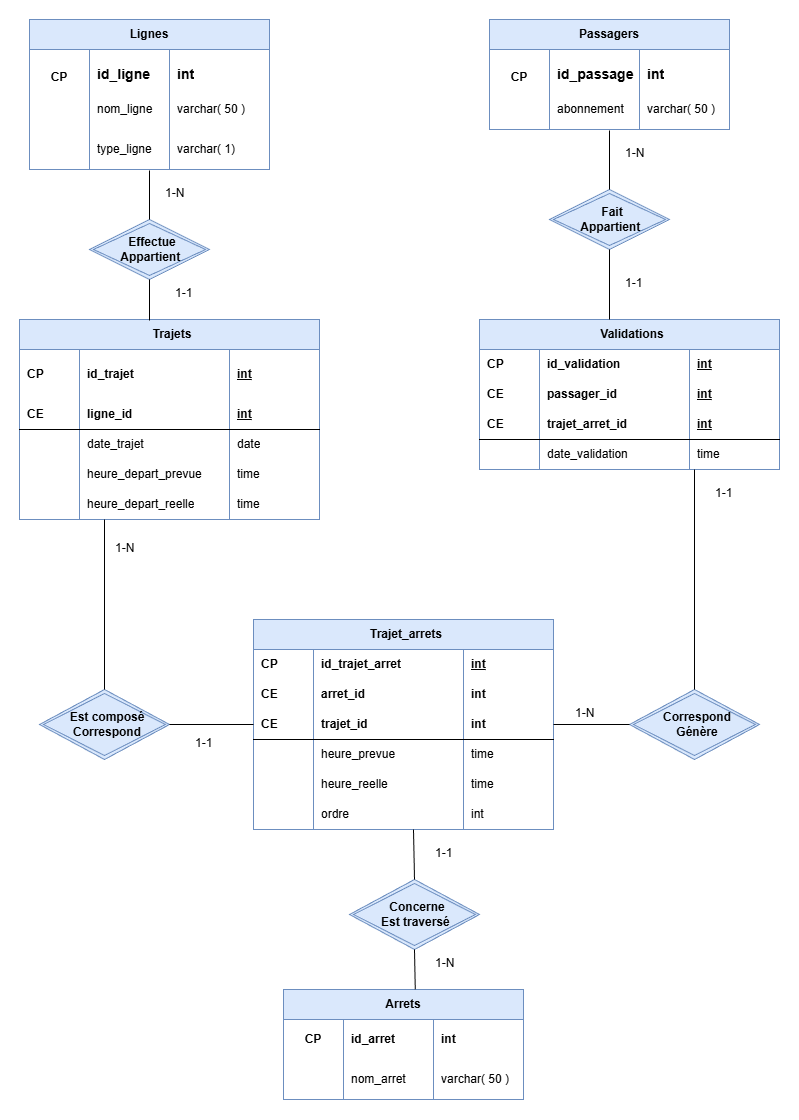

## 2.3 Insertion des données dans les tables
<a id="insertions"></a>

Une fois les tables créées, les données sont insérées de manière structurée.  
L’ordre d’insertion respecte les contraintes de clés étrangères :

1. **LIGNES**
2. ****PASSAGERS****
3. ****ARRETS****
4. **TRAJETS**
4. **TRAJET_ARRETS**
5. **VALIDATIONS**

**Création des données** : Pour créer nos données, nous avons réalisé une simulation avec Python afin de générer un volume plus important d'informations. Nous avions au départ enregistré des données manuellement, mais par la suite, les résultats n'étaient pas cohérents avec la réalité. 

Cette simulation nous a permis de générer :

- 1120 Arrêts et 58 Lignes (Données réelles de Divia)
- 4000 Passagers
- 10092 Trajets
- 80736 trajet_arrets
- 507 502 Validations

Nos enregistrements se font sur une durée d'une semaine et respectent le fait qu'il y ait plus de monde pour les Lianes et les trams que dans les autres lignes et plus de monde pendant la semaine que pendant le weekend. 

De plus nous avons pris en compte:

La limite des places selon le type de véhicule:
- Tramway(T): 200 passagers
- Lianes (L): 100 passagers
- Autres lignes(A): 60 passagers

Le fait que chaque passager ajoute 1,5 seconde au temps d'arrêt, et un blocage de 45 secondes est appliqué si le le bus ou le tram est bondé.

**Ouverture des données:** 

Nos données sont enregistrées dans le fichier divia_data.db. Afin d'explorer nos résultats et d'exécuter les analyses SQL, il est nécessaire, après avoir ouvert le fichier Notebook, d'établir la connexion avec le fichier divia_data.db. Pour cela, il suffit aussi d'ouvir le fichier dans la même page que celui du fichier notebook. 

In [1]:
CREATE TABLE IF NOT EXISTS LIGNES(
    id_ligne INT,
    nom_ligne VARCHAR(100),
    type_ligne VARCHAR(1),
    PRIMARY KEY(id_ligne)
);


In [2]:
CREATE TABLE IF NOT EXISTS ARRETS(
    id_arret INT,
    nom_arret VARCHAR(50),
    PRIMARY KEY(id_arret)
);


In [3]:
CREATE TABLE IF NOT EXISTS TRAJETS(
    id_trajet INT,
    ligne_id INT,
    date_trajet DATE,
    heure_depart_prevue TIME,
    heure_depart_reelle TIME,
    PRIMARY KEY(id_trajet),
    FOREIGN KEY(ligne_id) REFERENCES LIGNES(id_ligne)
);


In [4]:
CREATE TABLE IF NOT EXISTS TRAJET_ARRETS(
    id_trajet_arret INT,
    trajet_id INT,
    arret_id INT,
    ordre INT,
    heure_prevue TIME,
    heure_reelle TIME,
    PRIMARY KEY(id_trajet_arret),
    FOREIGN KEY(trajet_id) REFERENCES TRAJETS(id_trajet),
    FOREIGN KEY(arret_id) REFERENCES ARRETS(id_arret)
);


In [5]:
CREATE TABLE IF NOT EXISTS VALIDATIONS(
    id_validation INT,
    passager_id INT,
    trajet_arret_id INT,
    date_validation TIME,
    PRIMARY KEY(id_validation),
    FOREIGN KEY(passager_id) REFERENCES PASSAGERS(id_passager),
    FOREIGN KEY(trajet_arret_id) REFERENCES TRAJET_ARRETS(id_trajet_arret)
);


In [6]:
CREATE TABLE IF NOT EXISTS PASSAGERS(
    id_passager INT,
    abonnement VARCHAR(50),
    PRIMARY KEY(id_passager)
);


# 4. Requêtes d’analyse
<a id="analyses"></a>

Cette section regroupe toutes les requêtes SQL destinées à répondre aux objectifs d’analyse.  
Chaque sous-partie contient :

- une explication métier,
- la requête SQL correspondante,
- une éventuelle interprétation des résultats.

Les quatre axes principaux analysés sont :
- fréquentation,
- retards moyens,
- ponctualité des lignes,
- périodes d’affluence.


## 4.1. Fréquentation des lignes et des arrêts  <a id="freq"></a>

### 1.1. Fréquentation par ligne

Cette requête permet d’identifier les lignes les plus utilisées. Elle aide les gestionnaires à ajuster l’offre de transport (ajout de bus, fréquence plus élevée, optimisation des heures de pointe).

In [7]:
SELECT
    l.nom_ligne,
    COUNT(*) AS nb_passagers,
    l.type_ligne
FROM VALIDATIONS v
JOIN TRAJET_ARRETS ta ON ta.id_trajet_arret = v.trajet_arret_id
JOIN TRAJETS t ON t.id_trajet = ta.trajet_id
JOIN LIGNES l ON l.id_ligne = t.ligne_id
GROUP BY l.nom_ligne
ORDER BY nb_passagers DESC;


nom_ligne,nb_passagers,type_ligne
T1 - DIJON Gare <> QUETIGNY Centre,19130,T
T2 - CHENOVE Centre <> DIJON Valmy,19069,T
L9 - Toison d'Or <> Monge CIGV,12798,L
L6 - LONGVIC <> Toison d'Or,12727,L
LM - Carraz <> Grangier Ligne marché,12711,L
L8 - Chicago <> ST-APO Val Sully,12711,L
L4 - MARSANNAY PDS<>MONGE,12665,L
L3 - Fontaine d'Ouche <> Epirey Capno,12594,L
L5 - TALANT Dullin <> Universite,12232,L
L7 - QUETIGNY Europe <> CHEVIGNY,12046,L


Observation: les Trams (T) et les Liannes (L) sont les lignes les plus utilisées du réseau. C'est tout à fait logique puisque ce sont les lignes principales de Dijon qui passent le plus souvent.

### 1.2. Fréquentation par arrêt

 Cette requête permet d’identifier les arrêts les plus fréquentés, afin de prioriser l’installation d’abris,l’amélioration de la capacité locale par exemple

In [8]:
SELECT
    a.nom_arret,
    COUNT(*) AS nb_passagers
FROM VALIDATIONS v
JOIN TRAJET_ARRETS ta ON ta.id_trajet_arret = v.trajet_arret_id
JOIN ARRETS a ON a.id_arret = ta.arret_id
GROUP BY a.nom_arret
ORDER BY nb_passagers DESC;


nom_arret,nb_passagers
République,3303
Grésilles Trimolet,3079
Billardon,3058
Carraz,2891
Nation,2772
Monge Cité de la gastronomie,2728
Piscine Olympique,2694
Poincaré,2639
Rossignol Eiffel,2602
Parc des Sports,2507


l'arrêt "République" est le plus fréquenté du réseau. C'est tout à fait cohérent car cet arrêt est le cœur du centre-ville de Dijon, où de nombreuses lignes (Trams et Liannes) se croisent.

### 1.3. Fréquentation par jour

 Cette requête montre les variations journalières (jours ouvrables vs week-end). Permet d’adapter l’offre selon la demande réelle.

In [9]:
SELECT 
    T.date_trajet AS jour,
    COUNT(V.id_validation) AS nb_passagers
FROM VALIDATIONS V
JOIN TRAJET_ARRETS TA ON V.trajet_arret_id = TA.id_trajet_arret
JOIN TRAJETS T ON TA.trajet_id = T.id_trajet
GROUP BY jour
ORDER BY jour ASC;

jour,nb_passagers
2025-11-17,89498
2025-11-18,88440
2025-11-19,89827
2025-11-20,88905
2025-11-21,88883
2025-11-22,30712
2025-11-23,31237


Le nombre de passagers est très élevé du lundi au vendredi. En revanche, on remarque une baisse importante le samedi et le dimanche. Cela est tout à fait normal : il y a moins de trajets pour les études ou le travail durant le week-end

## 2. Calcul des retards moyens <a id="retards"></a>

Dans un réseau de transport urbain, le retard n’est pas uniquement un retard “au départ”.
La mesure la plus fiable est le retard à chaque arrêt, car elle reflète la réalité opérationnelle (arrêts, circulation, montée/descente de passagers).

Dans notre modèle, la table TRAJET_ARRETS est la table pivot : elle enregistre, pour chaque trajet, le passage à chaque arrêt avec un horaire prévu et un horaire réel.

Définition utilisée :

Retard (minutes) = heure réelle − heure prévue

### 2.1. Retard au départ du trajet 

In [10]:
SELECT 
    
    l.nom_ligne, 
    
    ROUND((strftime('%s', t.heure_depart_reelle) - 
           strftime('%s', t.heure_depart_prevue)) / 60.0, 2) AS retard_depart_min
FROM TRAJETS t
JOIN LIGNES l ON t.ligne_id = l.id_ligne
ORDER BY retard_depart_min DESC;

nom_ligne,retard_depart_min
13 - Motte Giron <> FONTAINE Village,2
14 - MARSANNAY Charon <> Charet,2
16 - QUETIGNY AC <> NEUILLY-CRIMOLOIS,2
18 - LONGVIC Carmelites <> Darcy,2
36 - BRESSEY <> QUETIGNY Grand Marche,2
40 - Toison d'Or <> Republique,2
41 - CHEVIGNY Z.I. <> Grand Marche,2
64 - BRESSEY <> L.Boivin / C. Rostand,2
68 - BRETENIERE <> Lycee H. Fontaine,2
70 - PLOMBIERES <> College Rameau,2


Beaucoup de bus commencent leur trajet avec environs deux minutes de retard au premier arrêt.

### 2.2. Retard par passage (arrêt par arrêt)

**Objectif**

Calculer le retard pour chaque passage d’un trajet à un arrêt.

**Intérêt métier**

Identifier précisément où le retard se crée dans le parcours (ex. un arrêt congestionné).


**Résultat attendu**

Une ligne = un passage (trajet X, arrêt Y, ordre Z) avec retard_minutes.

In [11]:
SELECT 
    ta.id_trajet_arret, 
    ta.trajet_id, 
    a.nom_arret, 
    ta.ordre,
    ROUND((strftime('%s', ta.heure_reelle) - 
           strftime('%s', ta.heure_prevue)) / 60.0, 2) AS Retard_minutes
FROM TRAJET_ARRETS ta
JOIN ARRETS a ON a.id_arret = ta.arret_id
ORDER BY retard_minutes DESC;

id_trajet_arret,trajet_id,nom_arret,ordre,Retard_minutes
27480,3435,Spuller,8,14.32
27544,3443,Trianon,8,14.25
27752,3469,Pierrat,8,14.18
55632,6954,Colombier,8,13.63
69368,8671,Longènes,8,13.37
55416,6927,Trois Saffres,8,13.18
27543,3443,Changey,7,13.08
27479,3435,Strasbourg,7,13.07
69552,8694,St-François,8,12.85
55352,6919,Ronde,8,12.55


On remarque que les retards les plus forts apparaissent souvent sur les arrêts avec un chiffre d'ordre élevé. Ce qui confirme que le retard s'accumule de plus en plus  au fur et à mesure que le bus avance.

### 2.3. Retard moyen par trajet — performance d’un trajet complet

**Objectif**

-Mesurer la ponctualité globale d’un trajet (ex. “Trajet 10005”).

Cela permet de repérer les bus qui sont le plus en retard du début à la fin de leur voyage. C’est la meilleure façon de voir quels horaires sont impossibles à tenir pour les chauffeurs à cause du trafic ou du monde

**Intérêt métier**

-Comparer deux trajets d’une même ligne (matin vs soir).

-Repérer les trajets qui dérivent fortement dans le temps.

**Principe**

On calcule le retard à chaque arrêt, puis on prend la moyenne sur les arrêts d’un même trajet.

In [31]:


SELECT
    ta.trajet_id AS id_trajet,
    ROUND(
        AVG(
            (strftime('%s', ta.heure_reelle) - strftime('%s', ta.heure_prevue)) / 60.0
        )
    , 2) AS retard_moyen_minutes
FROM TRAJET_ARRETS ta
GROUP BY ta.trajet_id
ORDER BY retard_moyen_minutes DESC;


id_trajet,retard_moyen_minutes
3435,9.35
3443,9.25
3469,9.02
6954,8.88
6927,8.78
8682,8.62
6919,8.56
1723,8.56
8694,8.52
3454,8.46


 Certains bus ne sont pas juste en retard à un arrêt, ils sont en retard pendant tout leur trajet. On voit des moyennes monter jusqu'à 9 minutes.

 ### 2.4. Retard moyen par ligne

**Objectif**

Mesurer la ponctualité globale de chaque ligne.

**Intérêt métier**

KPI stratégique pour l’exploitant : quelles lignes doivent être optimisées ?

Sert d’entrée pour un tableau de bord (classement, suivi mensuel).

**Principe**

TRAJET_ARRETS fournit les retards, puis on remonte à la ligne via TRAJETS.

In [13]:
SELECT
    l.id_ligne,
    l.nom_ligne,
    l.type_ligne,
    ROUND(
        AVG(
            (strftime('%s', ta.heure_reelle) - strftime('%s', ta.heure_prevue)) / 60.0
        )
    , 2) AS retard_moyen_minutes
FROM TRAJET_ARRETS ta
JOIN TRAJETS t ON t.id_trajet = ta.trajet_id
JOIN LIGNES l ON l.id_ligne = t.ligne_id
GROUP BY l.id_ligne, l.nom_ligne
ORDER BY retard_moyen_minutes DESC;

id_ligne,nom_ligne,type_ligne,retard_moyen_minutes
58,T2 - CHENOVE Centre <> DIJON Valmy,T,5.58
57,T1 - DIJON Gare <> QUETIGNY Centre,T,5.5
54,LM - Carraz <> Grangier Ligne marché,L,5.16
50,L6 - LONGVIC <> Toison d'Or,L,5.09
52,L8 - Chicago <> ST-APO Val Sully,L,5.07
49,L5 - TALANT Dullin <> Universite,L,5.06
53,L9 - Toison d'Or <> Monge CIGV,L,4.99
48,L4 - MARSANNAY PDS<>MONGE,L,4.97
47,L3 - Fontaine d'Ouche <> Epirey Capno,L,4.96
51,L7 - QUETIGNY Europe <> CHEVIGNY,L,4.87


Les Trams (T1 et T2) sont les plus en retard avec plus de 5 minutes de décalage en moyenne.

Ce sont les lignes qui transportent le plus de monde et qui traversent toute la ville. Plus il y a de passagers, plus le bus ou le tram perd du temps à chaque arrêt.

Ensuite se sont les lianes qui suivent de près.

# 3. Classement des lignes les plus ponctuelles

### 3.1. Classement basé sur le retard moyen

Permet de comparer l’efficacité opérationnelle des lignes. Les gestionnaires identifient rapidement les lignes exemplaires et celles à améliorer.

In [14]:

SELECT
    l.nom_ligne,
    
    -- Calcul des minutes entières
    CAST(AVG(strftime('%s', t.heure_depart_reelle) - strftime('%s', t.heure_depart_prevue)) AS INT) / 60 AS retard_min_moyen,
   
   -- Calcul des secondes restantes
    ABS(CAST(AVG(strftime('%s', t.heure_depart_reelle) - strftime('%s', t.heure_depart_prevue)) AS INT) % 60) AS retard_sec,
   
   -- Ajout du volume de données pour la fiabilité
     COUNT(*) AS nb_trajets_observes
    
FROM TRAJETS t
JOIN LIGNES l ON l.id_ligne = t.ligne_id


GROUP BY l.nom_ligne
ORDER BY retard_min_moyen ASC, retard_sec ASC; -- plus ponctuel en premier


nom_ligne,retard_min_moyen,retard_sec,nb_trajets_observes
75 - FLAVIGNEROT <> College Dunant,0,54,174
T1 - DIJON Gare <> QUETIGNY Centre,0,55,174
10 - TALANT Citadelle <> AHUY,0,56,174
67 - CRIMOLOIS-SENNECEY <> 30 Octobre,0,56,174
68 - BRETENIERE <> Lycee H. Fontaine,0,56,174
69 - CRIMOLOIS-SENNECEY <> L. Boivin,0,56,174
L7 - QUETIGNY Europe <> CHEVIGNY,0,56,174
T2 - CHENOVE Centre <> DIJON Valmy,0,56,174
35 - Montagne de Larrey <> Monge CIGV,0,57,174
41 - CHEVIGNY Z.I. <> Grand Marche,0,57,174


## 3.2 Lignes  les plus ponctuelles du debuts jusqu'à la fin du trajet

In [30]:


SELECT
    --ta.trajet_id AS id_trajet,
    nom_ligne,
    ROUND(
        AVG(
            (strftime('%s', ta.heure_reelle) - strftime('%s', ta.heure_prevue)) / 60.0
        )
    , 2) AS retard_moyen_minutes
FROM TRAJET_ARRETS ta
inner join trajets as a on a.id_trajet= ta.trajet_id
inner join lignes as l on l.id_ligne= a.ligne_id
GROUP BY l.nom_ligne
ORDER BY retard_moyen_minutes ;


nom_ligne,retard_moyen_minutes
75 - FLAVIGNEROT <> College Dunant,4.43
10 - TALANT Citadelle <> AHUY,4.45
68 - BRETENIERE <> Lycee H. Fontaine,4.45
67 - CRIMOLOIS-SENNECEY <> 30 Octobre,4.47
69 - CRIMOLOIS-SENNECEY <> L. Boivin,4.47
41 - CHEVIGNY Z.I. <> Grand Marche,4.48
35 - Montagne de Larrey <> Monge CIGV,4.5
37 - MAGNY <> QUETIGNY Grand Marche,4.5
62 - FENAY <> Lycee H. Fontaine,4.5
64 - BRESSEY <> L.Boivin / C. Rostand,4.51


Presque toutes les lignes partent avec un petit retard moyen, souvent compris entre 50 et 60 secondes.

### 3.2. Pourcentage de trajets à l’heure

le taux de ponctualité au départ offre une mesure qualitative de la ponctualité, plus significative qu’une simple moyenne.

Remarque: Un trajet est considéré comme « à l’heure » s’il part entre 0 et 3 minutes (180 secondes) après l’heure théorique. Tout départ anticipé (avance) ou retard supérieur à 3 minutes est comptabilisé comme non ponctuel.

In [15]:
SELECT 
    l.nom_ligne,
    
    -- Calcul du pourcentage de ponctualité (entre 0 et 3 minutes de retard)
    ROUND(
        COUNT(CASE 
            WHEN (strftime('%s', t.heure_depart_reelle) - strftime('%s', t.heure_depart_prevue))  
            THEN 1 
        END) * 100.0 / COUNT(*), 2) AS taux_ponctualite_pourcent,
    
    COUNT(*) AS total_trajets
    
FROM TRAJETS t
JOIN LIGNES l ON l.id_ligne = t.ligne_id

GROUP BY l.nom_ligne
ORDER BY taux_ponctualite_pourcent DESC;




nom_ligne,taux_ponctualite_pourcent,total_trajets
CO - Fontaine d'Ouche <> Marmuzots,100,174
93 - Navette Personnel + Bus RES,100,174
62 - FENAY <> Lycee H. Fontaine,100,174
42 - Les Ateliers <> CHENOVE C. Cial,100,174
37 - MAGNY <> QUETIGNY Grand Marche,100,174
19 - ST-APO. Pre Thomas <> Gresilles,100,174
18 - LONGVIC Carmelites <> Darcy,100,174
14 - MARSANNAY Charon <> Charet,100,174
13 - Motte Giron <> FONTAINE Village,100,174
T1 - DIJON Gare <> QUETIGNY Centre,99.43,174


Au départ du premier arrêt, le réseau est parfaitement ponctuel. Chaque bus respecte la fenêtre de tolérance de 0 à 3 minutes.

Le problème de ponctualité sur ton réseau ne vient donc pas de l'organisation des départs, mais uniquement de ce qui se passe pendant le trajet (embouteillages, nombre de passagers aux arrêts intermédiaires)

# 4. Périodes de forte affluence

Regardons maintenant si ces retards sont corrélés à l'affluence des passagers, afin de vérifier si la surcharge des véhicules est un facteur aggravant des retards constatés

### 4.1. Affluence par heure

Permet d’identifier les heures de pointe réelles. Aide à décider :
- d’augmenter la fréquence,
- d’ajuster les amplitudes horaires,
- d’allouer des bus supplémentaires.

In [16]:
SELECT
    strftime('%H', v.date_validation) AS heure,
    COUNT(*) AS nb_passagers
FROM VALIDATIONS v
GROUP BY heure
ORDER BY nb_passagers DESC;


heure,nb_passagers
09,39578
08,38452
17,38263
18,37912
16,34427
07,33932
19,32999
10,32304
14,28314
20,27808


Le réseau sature aux heures de pointe (7h-9h et 17h-18h). Cette forte affluence concentrée sur de courts moments est la cause directe des retards observés.

### 4.2. Affluence par tranche horaire (matin/soir)

Permet d'avoir une  vue plus générale : matinée vs soirée. Utile pour planifier les équipes et les véhicules.

In [17]:
SELECT
    CASE
        WHEN CAST(strftime('%H', v.date_validation) AS INT) BETWEEN 6 AND 12 THEN 'Matin'
        WHEN CAST(strftime('%H', v.date_validation) AS INT) BETWEEN 18 AND 23 THEN 'Soir'
        ELSE 'Autres'
    END AS periode,
    COUNT(*) AS nb_passagers
FROM VALIDATIONS v
GROUP BY periode
ORDER BY nb_passagers DESC;


periode,nb_passagers
Matin,215967
Autres,154590
Soir,136945


Le réseau est beaucoup plus utilisé le matin que le soir. C’est donc en début de journée que les bus sont les plus surchargés et que les retards sont les plus fréquents.

### 4.3. Arrêts les plus fréquentés durant les heures de pointe

Met en évidence les arrêts les plus saturés du réseau.

In [18]:
SELECT
    a.nom_arret,
    COUNT(*) AS nb_passagers
FROM VALIDATIONS v
JOIN TRAJET_ARRETS ta ON ta.id_trajet_arret = v.trajet_arret_id
JOIN ARRETS a ON a.id_arret = ta.arret_id
WHERE CAST(strftime('%H', v.date_validation) AS INT) BETWEEN 7 AND 9
   OR CAST(strftime('%H', v.date_validation) AS INT) BETWEEN 17 AND 19
GROUP BY a.nom_arret
ORDER BY nb_passagers DESC



nom_arret,nb_passagers
République,1473
Carraz,1409
Billardon,1292
Nation,1276
Monge Cité de la gastronomie,1259
Université,1207
Grésilles Trimolet,1199
Parc des Sports,1194
Piscine Olympique,1123
Poincaré,1120


On voit que le retard ne se crée pas n'importe où. Il se concentre sur une poignée d'arrêts (comme République, l'Université ou  Monge Cité de la gastronomie). Ce sont ces arrêts qui "cassent" le rythme de la ligne parce qu'ils accueillent trop de monde d'un seul coup.

Conclusion: Pour améliorer le service, il ne faut pas forcément changer les horaires, mais plutôt fluidifier la montée des passagers aux arrêts clés pendant les heures critiques.

# 5. Conclusion
<a id="conclusion"></a>


- **lignes les plus fréquentées et arrêts critiques**: Les lignes de Tram (T1, T2) et les arrêts comme République, l'Université ou Monge Cité de la Gastronomie sont les plus chargés. Ce sont eux qui ralentissent le réseau à cause du temps de montée des passagers.


- **Ponctualité globale**: Le constat est très positif au départ avec 100 % de ponctualité au terminus. Le réseau est donc parfaitement dimensionné théoriquement, mais sa performance se dégrade en cours de trajet sous l'effet de facteurs externes (affluence)


- **Périodes de surcharge**: Les retards ne sont pas dus à une mauvaise gestion, mais aux pics d'affluence (7h-9h et 17h-19h) qui saturent les capacités de transport.


Pour conclure: Inutile de changer les horaires. Il vaut mieux ajouter des bus sur ces heures précises et fluidifier les validations aux arrêts les plus bondés pour gagner du temps.